In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!nvidia-smi

Sat Aug 31 19:00:32 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Problem description
Your goal is to predict how likely individuals are to receive their H1N1 and seasonal flu vaccines. Specifically, you'll be predicting two probabilities: one for `h1n1_vaccine` and one for `seasonal_vaccine`.

Each row in the dataset represents one person who responded to the National 2009 H1N1 Flu Survey.

For this competition, there are two target variables:

- `h1n1_vaccine` - Whether respondent received H1N1 flu vaccine.
- `seasonal_vaccine` - Whether respondent received seasonal flu vaccine.
Both are binary variables: 0 = No; 1 = Yes. Some respondents didn't get either vaccine, others got only one, and some got both. This is formulated as a multilabel (and not multiclass) problem.

The features in this dataset
You are provided a dataset with 36 columns. The first column respondent_id is a unique and random identifier. The remaining 35 features are described below.

For all binary variables: 0 = No; 1 = Yes.

- `h1n1_concern` - Level of concern about the H1N1 flu.
0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned. -> (__categorical__ __Ordinal__)
- `h1n1_knowledge` - Level of knowledge about H1N1 flu.
0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.
- `behavioral_antiviral_meds` - Has taken antiviral medications. (binary) -> (__categorical__ __Nominal__)
-`behavioral_avoidance` - Has avoided close contact with others with flu-like symptoms. (binary) -> (__categorical__ __Nominal__)
-`behavioral_face_mask` - Has bought a face mask. (binary) -> (__categorical__ __Nominal__)
behavioral_wash_hands - Has frequently washed hands or used hand sanitizer. (binary) -> (__categorical__ __Nominal__)
-`behavioral_large_gatherings` - Has reduced time at large gatherings. -> (__categorical__ __Nominal__)
-`behavioral_outside_home` - Has reduced contact with people outside of own household. -> (__categorical__ __Nominal__)
-`behavioral_touch_face` - Has avoided touching eyes, nose, or mouth. -> (__categorical__ __Nominal__)
-`doctor_recc_h1n1` - H1N1 flu vaccine was recommended by doctor. -> (__categorical__ __Nominal__)
-`doctor_recc_seasonal` - Seasonal flu vaccine was recommended by doctor. -> (__categorical__ __Nominal__)
-`chronic_med_condition` - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. -> (__categorical__ __Nominal__)
-`child_under_6_months` - Has regular close contact with a child under the age of six months. -> (__categorical__ __Nominal__)
-`health_worker` - Is a healthcare worker. -> (__categorical__ __Nominal__)
-`health_insurance` - Has health insurance. -> (__categorical__ __Nominal__)
-`opinion_h1n1_vacc_effective` - Respondent's opinion about H1N1 vaccine effectiveness.
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective. -> (__categorical__ __Ordinal__)
-`opinion_h1n1_risk` - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high. -> (__categorical__ __Ordinal__)
-`opinion_h1n1_sick_from_vacc` - Respondent's worry of getting sick from taking H1N1 vaccine.
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried. -> (__categorical__ __Ordinal__)
-`opinion_seas_vacc_effective` - Respondent's opinion about seasonal flu vaccine effectiveness.
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective. -> (__categorical__ __Ordinal__)
-`opinion_seas_risk` - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high. -> (__categorical__ __Ordinal__)
-`opinion_seas_sick_from_vacc` - Respondent's worry of getting sick from taking seasonal flu vaccine.
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried. -> (__categorical__ __Ordinal__)
-`age_group` - Age group of respondent.

 ```
 array(['55 - 64 Years', '35 - 44 Years', '18 - 34 Years', '65+Years', '45 - 54 Years'], dtype=object)
 ```
  -> (__categorical__ __Ordinal__)
-`education` - Self-reported education level. -> (__categorical__ __Ordinal__)
-`race` - Race of respondent. -> (__categorical__ __Nominal__)
-`sex` - Sex of respondent. -> (__categorical__ __Nominal__)
-`income_poverty` - Household annual income of respondent with respect to 2008 Census poverty thresholds. -> (__categorical__)
-`marital_status` - Marital status of respondent. -> (__categorical__ __Nominal__)
-`rent_or_own` - Housing situation of respondent. -> (__categorical__ __Nominal__)
-`employment_status` - Employment status of respondent. -> (__categorical__ __Nominal__)
-`hhs_geo_region` - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings. -> (__categorical__ __Nominal__)
-`census_msa` - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census. -> (__categorical__ __Nominal__)
-`household_adults` - Number of other adults in household, top-coded to 3. -> (__categorical__ __Ordinal__)
-`household_children` - Number of children in household, top-coded to 3. -> (__categorical__ __Ordinal__)
-`employment_industry` - Type of industry respondent is employed in.  Values are represented as short random character strings. -> (__categorical__ __Nominal__)
-`employment_occupation` - Type of occupation of respondent. Values are represented as short random character strings. -> (__categorical__ __Nominal__)

As shown above, most predictor variables are categorical, some being _Ordinal_ and others _Nominal_.

In [4]:
#  All necessary imports for data preprocessing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
from scipy.stats import skew, kurtosis
%matplotlib inline
warnings.filterwarnings("ignore")


In [5]:
# load data
path = "./drive/MyDrive/data/"
train_features_df = pd.read_csv(path + "training_set_features.csv")
train_labels_df = pd.read_csv(path + "training_set_labels.csv")

In [6]:
train_features_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [7]:
train_labels_df.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [8]:
train_features_df.shape, train_labels_df.shape

((26707, 36), (26707, 3))

In [9]:
train_features_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [10]:
train_labels_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


In [11]:
# check unique features
print("- age_group: ", train_features_df["age_group"].unique())
print()
print("- education: ", train_features_df["education"].unique())
print()
print("- race: ", train_features_df["race"].unique())
print()
print("- sex: ", train_features_df["sex"].unique())
print()
print("- income_poverty: ", train_features_df["income_poverty"].unique())
print()
print("- marital_status: ", train_features_df["marital_status"].unique())
print()
print("- rent_or_own: ", train_features_df["rent_or_own"].unique())
print()
print("- employment_status: ", train_features_df["employment_status"].unique())
print()
print("- hhs_geo_region: ", train_features_df["hhs_geo_region"].unique())
print()
print("- household_adults: ", train_features_df["household_adults"].unique())
print()
print("- household_children: ", train_features_df["household_children"].unique())
print()
print("- census_msa: ", train_features_df["census_msa"].unique())
print()
print("- employment_industry: ", train_features_df["employment_industry"].unique())
print()
print("- employment_occupation: ", train_features_df["employment_occupation"].unique())
print()

- age_group:  ['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 '45 - 54 Years']

- education:  ['< 12 Years' '12 Years' 'College Graduate' 'Some College' nan]

- race:  ['White' 'Black' 'Other or Multiple' 'Hispanic']

- sex:  ['Female' 'Male']

- income_poverty:  ['Below Poverty' '<= $75,000, Above Poverty' '> $75,000' nan]

- marital_status:  ['Not Married' 'Married' nan]

- rent_or_own:  ['Own' 'Rent' nan]

- employment_status:  ['Not in Labor Force' 'Employed' 'Unemployed' nan]

- hhs_geo_region:  ['oxchjgsf' 'bhuqouqj' 'qufhixun' 'lrircsnp' 'atmpeygn' 'lzgpxyit'
 'fpwskwrf' 'mlyzmhmf' 'dqpwygqj' 'kbazzjca']

- household_adults:  [ 0.  2.  1.  3. nan]

- household_children:  [ 0.  3.  2.  1. nan]

- census_msa:  ['Non-MSA' 'MSA, Not Principle  City' 'MSA, Principle City']

- employment_industry:  [nan 'pxcmvdjn' 'rucpziij' 'wxleyezf' 'saaquncn' 'xicduogh' 'ldnlellj'
 'wlfvacwt' 'nduyfdeo' 'fcxhlnwr' 'vjjrobsf' 'arjwrbjb' 'atmlpfrs'
 'msuufmds' 'xqicxuve' 'phxvnwax' 'do

In [12]:
# combine train and test for preprocessing
train_data = pd.merge(train_features_df, train_labels_df, on="respondent_id")
train_data.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [13]:
# Check for missing values
print("Dataframe shape: ", train_data.shape)
print("\nMissing Values in Training Features:")
print(train_data.isnull().sum())

Dataframe shape:  (26707, 38)

Missing Values in Training Features:
respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex    

# Preprocessing (data cleaning)



## Handle missing values
- Step 1. Remove the features with an excessively high number of missing values (typically more than half the length of the data set).

In [14]:
# Drop columns with excessive missing values
missing_threshold = 0.5
train_data = train_data.loc[:, train_data.isnull().mean() < missing_threshold]

print("New dataframe shape: ", train_data.shape)
print("\nMissing Values in Training Features:")
print(train_data.isnull().sum())

New dataframe shape:  (26707, 37)

Missing Values in Training Features:
respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex

- **Step 2.  Imputation with "Unknown" or Mode**
  - **Imputation with "Unknown" Category**

    Best for Nominal Variables: For categorical features where the missing value doesn't have an inherent order or ranking (nominal features), it's common to replace missing values with a placeholder category like **"Unknown."** This approach prevents the loss of information and keeps the categorical nature intact.
    
  - >**Why ?** Since nominal categories don't have a natural order, introducing a new category for missing data ensures that no assumptions are made about the missing values.

  - **Imputation with Mode**

    Best for Ordinal Variables: For ordinal features (categorical features with a natural order or ranking), it's usually better to impute missing values with the mode (the most frequent category). This maintains the integrity of the ordinal nature while filling in missing values with the most likely category.
  - >**Why ?** Using the mode preserves the order of the categories and can be more informative than introducing a separate "Unknown" category.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Separate features and labels
train_features_df = train_data.drop(columns=["respondent_id", "h1n1_vaccine", "seasonal_vaccine"])
train_labels_df = train_data[["h1n1_vaccine", "seasonal_vaccine"]]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_features_df, train_labels_df, test_size=0.2, random_state=42)

# Identify nominal and ordinal features
nominal_features = [
    'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask',
    'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home',
    'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
    'chronic_med_condition', 'child_under_6_months', 'health_worker',
    'health_insurance', 'race', 'sex', 'marital_status', 'rent_or_own',
    'employment_status', 'hhs_geo_region', 'census_msa', 'employment_industry'
]

ordinal_features = [
    'h1n1_concern', 'h1n1_knowledge', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk',
    'opinion_seas_sick_from_vacc', 'age_group', 'education', 'income_poverty',
    'household_adults', 'household_children'
]

# Check for all columns
assert set(nominal_features + ordinal_features) == set(X_train.columns)

# Impute nominal features with 'Unknown'
nominal_imputer = SimpleImputer(strategy='constant', fill_value='Unknown')
X_train[nominal_features] = nominal_imputer.fit_transform(X_train[nominal_features])
X_test[nominal_features] = nominal_imputer.transform(X_test[nominal_features])

# Impute ordinal features with mode
ordinal_imputer = SimpleImputer(strategy='most_frequent')
X_train[ordinal_features] = ordinal_imputer.fit_transform(X_train[ordinal_features])
X_test[ordinal_features] = ordinal_imputer.transform(X_test[ordinal_features])

# After imputations, check the results for any missing values
print("New training set shape: ", X_train.shape)
print("New testing set shape: ", X_test.shape)
print("\nMissing Values in Training Features:")
print(X_train.isnull().sum())

print("\nMissing Values in Testing Features:")
print(X_test.isnull().sum())

# merge X_train with y_train and X_test with y_test for further processing
train_data_imputed = pd.concat([X_train, y_train], axis=1)
test_data_imputed = pd.concat([X_test, y_test], axis=1)

New training set shape:  (21365, 34)
New testing set shape:  (5342, 34)

Missing Values in Training Features:
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0

In [16]:
# convert all float data types to ints (they ought to be categorical && discrete)
def convert_to_int(x):
  if x == "unknown":
    return x
  try:
    return int(x)
  except ValueError:
    return x

train_data_imputed = train_data_imputed.applymap(convert_to_int)
test_data_imputed = test_data_imputed.applymap(convert_to_int)

# inspect once more
for col in train_data_imputed.columns:
  if col == "respondent_id":
    continue
  print(f"- {col}: ", train_data_imputed[col].unique())

- h1n1_concern:  [2 0 1 3]
- h1n1_knowledge:  [1 0 2]
- behavioral_antiviral_meds:  [0 1 'Unknown']
- behavioral_avoidance:  [1 0 'Unknown']
- behavioral_face_mask:  [0 1 'Unknown']
- behavioral_wash_hands:  [1 0 'Unknown']
- behavioral_large_gatherings:  [0 1 'Unknown']
- behavioral_outside_home:  [1 0 'Unknown']
- behavioral_touch_face:  [1 0 'Unknown']
- doctor_recc_h1n1:  [0 1 'Unknown']
- doctor_recc_seasonal:  [0 1 'Unknown']
- chronic_med_condition:  [1 0 'Unknown']
- child_under_6_months:  [0 1 'Unknown']
- health_worker:  [0 1 'Unknown']
- health_insurance:  [0 'Unknown' 1]
- opinion_h1n1_vacc_effective:  [5 1 4 3 2]
- opinion_h1n1_risk:  [4 2 1 5 3]
- opinion_h1n1_sick_from_vacc:  [2 4 1 5 3]
- opinion_seas_vacc_effective:  [4 5 1 3 2]
- opinion_seas_risk:  [4 2 1 5 3]
- opinion_seas_sick_from_vacc:  [2 4 1 5 3]
- age_group:  ['45 - 54 Years' '35 - 44 Years' '65+ Years' '55 - 64 Years'
 '18 - 34 Years']
- education:  ['Some College' 'College Graduate' '12 Years' '< 12 Years']

## Handle Duplicates

In [17]:
# Handling Duplicates:
duplicate_rows = train_data_imputed[train_data_imputed.duplicated()]
num_duplicate_rows = len(duplicate_rows)
print(f"Number of duplicate rows (train): {num_duplicate_rows}")

duplicate_rows = test_data_imputed[test_data_imputed.duplicated()]
num_duplicate_rows = len(duplicate_rows)
print(f"Number of duplicate rows (test): {num_duplicate_rows}")

Number of duplicate rows (train): 1
Number of duplicate rows (test): 0


In [18]:
# drop duplicates
train_data_imputed = train_data_imputed.drop_duplicates()
test_data_imputed = test_data_imputed.drop_duplicates()

# confirm
duplicate_rows = train_data_imputed[train_data_imputed.duplicated()]
num_duplicate_rows = len(duplicate_rows)
print(f"Number of duplicate rows (train): {num_duplicate_rows}")

Number of duplicate rows (train): 0


# Explorative Data Analysis
First we perform some Exploratory Data Analysis as an initial step to check what our data
contains. This will provide us with valuable insights into what the data contains and its basic
characteristics. Here's what we do during the EDA:

## Univariate Analysis


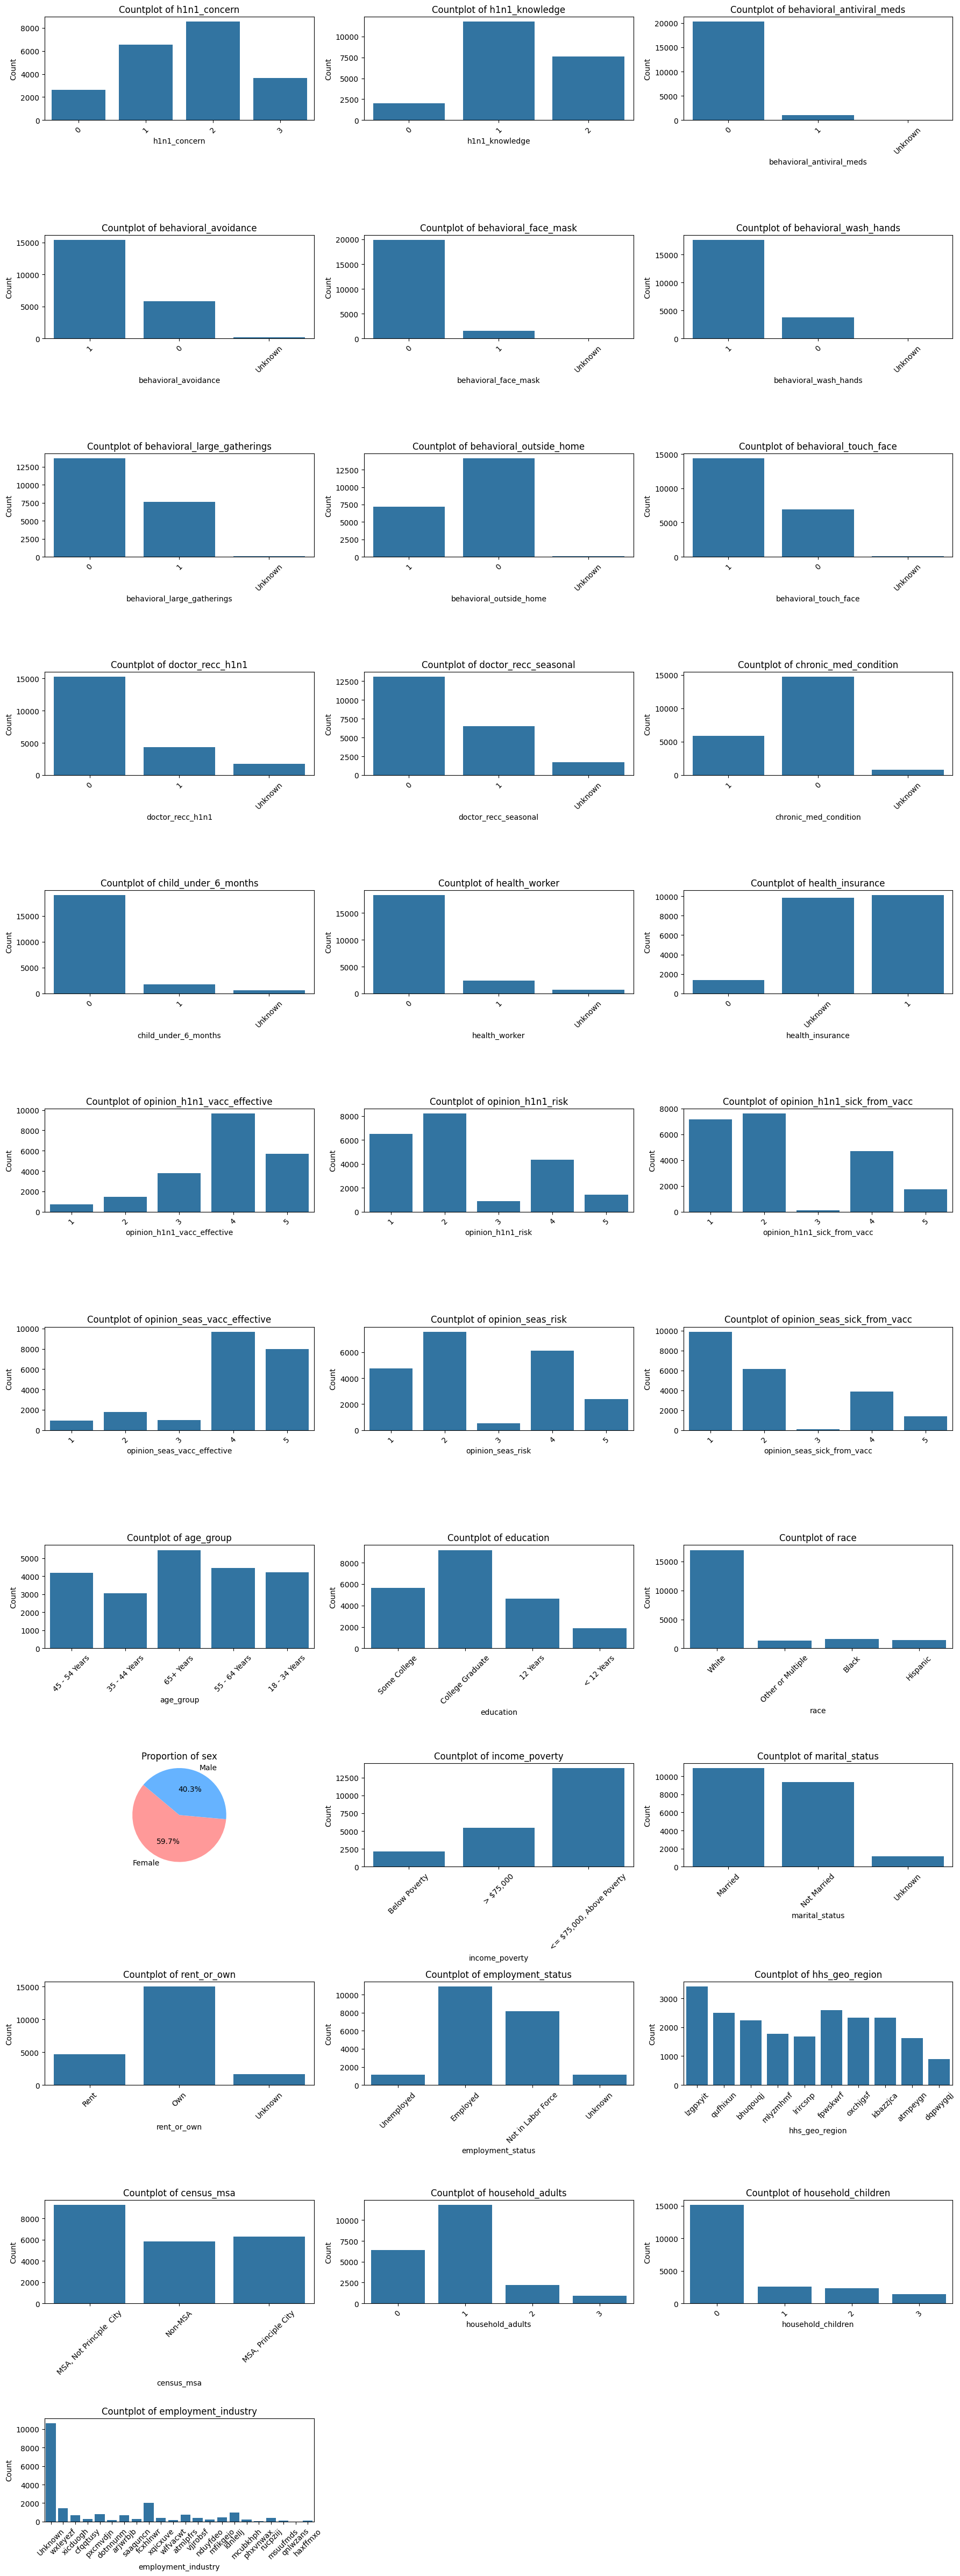

In [19]:
# # Drop 'respondent_id', 'h1n1_vaccine', 'seasonal_vaccine' from the features
train_features_df = train_data_imputed.drop(columns=["h1n1_vaccine", "seasonal_vaccine"])
train_labels_df = train_data_imputed[["h1n1_vaccine", "seasonal_vaccine"]]

train_feat_cols = list(train_features_df.columns)

# Function to create a pie chart for binary variables
def plot_pie_chart(data: pd.DataFrame, column: str, ax: plt.Axes, title: str) -> None:
  """
  plot pie chart for binary variables
  :param data: dataframe
  :param column: column name
  :param ax: axis
  :param title: title of the plot
  """
  labels = ['No', 'Yes']

  if column == "sex":
      labels = ['Female', 'Male']

  counts = data[column].value_counts()
  sizes = counts.values
  colors = ['#ff9999', '#66b3ff']

  ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
  ax.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
  ax.set_title(title)

# Set up a grid of subplots with 3 columns per row
n_cols = 3
n_rows = (len(train_feat_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, n_rows * 4))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create plots for each categorical variable
for i, var in enumerate(train_feat_cols):
    if train_features_df[var].nunique() == 2:  # Check if the variable is binary
        plot_pie_chart(train_features_df, var, axes[i], f'Proportion of {var}')
    else:
        sns.countplot(data=train_features_df, x=var, ax=axes[i])
        axes[i].set_title(f'Countplot of {var}')
        axes[i].set_xlabel(var)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)  # Rotate x-tick labels for better readability

# Hide any unused subplots

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [20]:
train_features_df.describe()

,h1n1_concern,h1n1_knowledge,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,21364.000000,21364.000000,21364.000000,21364.000000,21364.000000,21364.000000,21364.000000,21364.000000,21364.000000,21364.000000
mean,1.619406,1.263902,3.851292,2.340760,2.355832,4.029161,2.708248,2.098717,0.889955,0.530846
std,0.907984,0.616752,1.001440,1.279124,1.353340,1.072673,1.375971,1.331017,0.750985,0.926566
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,2.000000,1.000000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,2.000000,2.000000,5.000000,4.000000,4.000000,5.000000,4.000000,2.000000,1.000000,1.000000
max,3.000000,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [21]:
# Define the mappings for ordinal features
ordinal_mappings = {
    'h1n1_concern': {
        'Not at all concerned': 0,
        'Not very concerned': 1,
        'Somewhat concerned': 2,
        'Very concerned': 3
    },
    'h1n1_knowledge': {
        'No knowledge': 0,
        'Some knowledge': 1,
        'Knowledgeable': 2
    },
    'opinion_h1n1_vacc_effective': {
        'Not effective at all': 0,
        'Not very effective': 1,
        'Somewhat effective': 2,
        'Very effective': 3
    },
    'opinion_h1n1_risk': {
        'No risk': 0,
        'Low risk': 1,
        'Moderate risk': 2,
        'High risk': 3
    },
    'opinion_h1n1_sick_from_vacc': {
        'Not at all likely': 0,
        'Not very likely': 1,
        'Somewhat likely': 2,
        'Very likely': 3
    },
    'opinion_seas_vacc_effective': {
        'Not effective at all': 0,
        'Not very effective': 1,
        'Somewhat effective': 2,
        'Very effective': 3
    },
    'opinion_seas_risk': {
        'No risk': 0,
        'Low risk': 1,
        'Moderate risk': 2,
        'High risk': 3
    },
    'opinion_seas_sick_from_vacc': {
        'Not at all likely': 0,
        'Not very likely': 1,
        'Somewhat likely': 2,
        'Very likely': 3
    },
    'age_group': {
        '18 - 34 Years': 0,
        '35 - 44 Years': 1,
        '45 - 54 Years': 2,
        '55 - 64 Years': 3,
        '65+ Years': 4
    },
    'education': {
        '< 12 Years': 0,
        '12 Years': 1,
        'Some College': 2,
        'College Graduate': 3,
        'Some Post-Graduate': 4
    },
    'income_poverty': {
        'Below Poverty': 0,
        '<= $75,000, Above Poverty': 1,
        '> $75,000': 2
    },
    'household_adults': {
        '1 Adult': 0,
        '2 Adults': 1,
        '3+ Adults': 2
    },
    'household_children': {
        '0 Children': 0,
        '1 Child': 1,
        '2 Children': 2,
        '3+ Children': 3
    }
}

# Apply the mappings using replace function
for feature, mapping in ordinal_mappings.items():
    train_data_imputed[feature] = train_data_imputed[feature].replace(mapping)
    test_data_imputed[feature] = test_data_imputed[feature].replace(mapping)

# Verify the changes
print(train_data_imputed[list(ordinal_mappings.keys())].head())
print(test_data_imputed[list(ordinal_mappings.keys())].head())


       h1n1_concern  h1n1_knowledge  opinion_h1n1_vacc_effective  \
24706             2               1                            5   
5393              2               1                            5   
20898             0               1                            1   
3429              1               1                            4   
8731              1               0                            3   

       opinion_h1n1_risk  opinion_h1n1_sick_from_vacc  \
24706                  4                            2   
5393                   4                            4   
20898                  2                            1   
3429                   2                            1   
8731                   2                            5   

       opinion_seas_vacc_effective  opinion_seas_risk  \
24706                            4                  4   
5393                             5                  4   
20898                            1                  4   
3429                

## Bivariate analysis

In [22]:
# Calculate the correlation matrix
correlation_matrix = train_data_imputed[ordinal_features].corr()
correlation_matrix


,h1n1_concern,h1n1_knowledge,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,income_poverty,household_adults,household_children
h1n1_concern,1.000000,0.060501,0.237931,0.380135,0.359653,0.230938,0.332774,0.217819,0.061646,-0.067065,-0.059723,-0.016186,0.047478
h1n1_knowledge,0.060501,1.000000,0.118565,0.074454,-0.017564,0.081906,0.082678,-0.053120,-0.048516,0.284267,0.230062,0.025209,0.053087
opinion_h1n1_vacc_effective,0.237931,0.118565,1.000000,0.260206,0.064120,0.469906,0.259063,0.012594,0.019623,0.058020,0.064140,0.009174,-0.013293
opinion_h1n1_risk,0.380135,0.074454,0.260206,1.000000,0.336050,0.226077,0.566253,0.196428,-0.057857,-0.029701,-0.022854,0.029147,0.090699
opinion_h1n1_sick_from_vacc,0.359653,-0.017564,0.064120,0.336050,1.000000,0.078495,0.268038,0.486767,-0.041518,-0.087698,-0.089127,0.010435,0.066839
opinion_seas_vacc_effective,0.230938,0.081906,0.469906,0.226077,0.078495,1.000000,0.342829,-0.019721,0.138657,0.012965,0.038447,-0.021235,-0.076849
opinion_seas_risk,0.332774,0.082678,0.259063,0.566253,0.268038,0.342829,1.000000,0.203918,0.034533,-0.024466,-0.009495,0.008203,0.026831
opinion_seas_sick_from_vacc,0.217819,-0.053120,0.012594,0.196428,0.486767,-0.019721,0.203918,1.000000,-0.065882,-0.118998,-0.100700,0.020656,0.056419
age_group,0.061646,-0.048516,0.019623,-0.057857,-0.041518,0.138657,0.034533,-0.065882,1.000000,-0.081148,-0.039228,-0.247927,-0.437528
education,-0.067065,0.284267,0.058020,-0.029701,-0.087698,0.012965,-0.024466,-0.118998,-0.081148,1.000000,0.371948,-0.008600,0.045605


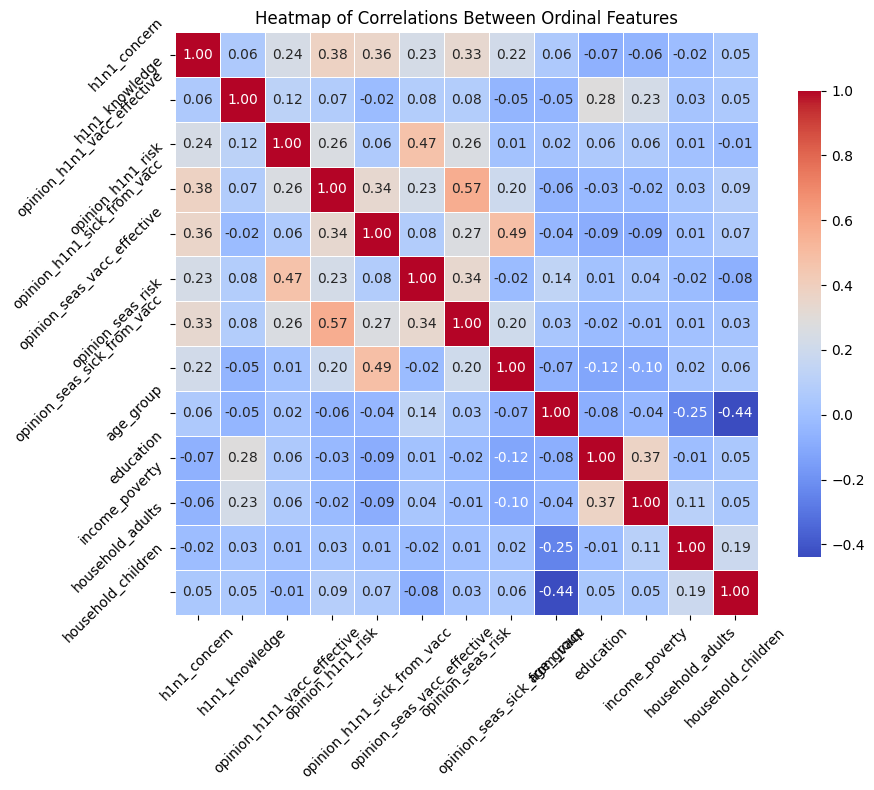

In [23]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, linewidths=0.5)

# Title and labels
plt.title('Heatmap of Correlations Between Ordinal Features')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

__Insights from the correlation matrix:__

1. **Strongest Positive Correlations**:
   - **`opinion_h1n1_risk` vs `opinion_seas_risk` (0.566)**: Individuals who perceive a higher risk from the H1N1 vaccine are likely to also perceive a higher risk from the seasonal flu vaccine.
   - **`opinion_h1n1_sick_from_vacc` vs `opinion_seas_sick_from_vacc` (0.486)**: A belief that one might get sick from the H1N1 vaccine is associated with a similar belief regarding the seasonal flu vaccine.
   - **`opinion_h1n1_vacc_effective` vs `opinion_seas_vacc_effective` (0.470)**: Individuals who believe the H1N1 vaccine is effective are also more likely to believe in the effectiveness of the seasonal flu vaccine.

2. **Moderate Positive Correlations**:
   - **`opinion_h1n1_risk` vs `h1n1_concern` (0.380)**: Those who are more concerned about H1N1 are also likely to believe there is a higher risk associated with it.
   - **`opinion_h1n1_sick_from_vacc` vs `opinion_h1n1_risk` (0.336)**: Those who believe they could get sick from the H1N1 vaccine are also more likely to perceive the risk of H1N1 as higher.

   - **`opinion_h1n1_risk` vs `opinion_h1n1_vacc_effective` (0.260)**: Those who perceive a higher risk from H1N1 are more likely to believe that the vaccine is effective.


3. **Negative Correlations**:
   - **`age_group` vs `household_children` (-0.438)**: Older individuals tend to have fewer children in their households.
   - **`education` vs `age_group` (-0.081)**: Higher education levels are weakly negatively correlated with age, indicating that older individuals in the dataset might have slightly lower education levels.
   - **`education` vs `opinion_h1n1_sick_from_vacc` (-0.088)**: Higher education levels are weakly associated with a lower belief that the H1N1 vaccine could make someone sick.

4. **Weak or Negligible Correlations**:
   - Many features, such as `household_adults` and `income_poverty` or `opinion_seas_vacc_effective`, have very weak correlations with other features, indicating that these features may not strongly influence each other.

5. **Educational Insights**:
   - **`education` vs `income_poverty` (0.372)**: Higher education is moderately correlated with lower poverty levels, which is expected.

6. **Perception of Vaccines**:
   - The correlations between perceptions of the H1N1 vaccine and the seasonal flu vaccine (e.g., effectiveness, risk, and sickness from the vaccine) suggest that individuals’ views on one vaccine are often mirrored in their views on the other. This could be due to general attitudes towards vaccination.

7. **Household Dynamics**:
   - **`household_children` vs `age_group` (-0.438)**: As people get older, they tend to have fewer children in the household, which makes sense given typical family life cycles.

**Summary:**
- **Perception Patterns**: There are clear patterns in how people perceive the risks and benefits of vaccines, with those who are concerned about one aspect (e.g., risk) being concerned about related aspects (e.g., getting sick from the vaccine).
- **Educational and Age Factors**: Higher education seems to buffer against concerns about vaccine safety, while age is inversely related to having children in the household.
- **Poverty and Education**: As expected, higher education correlates with lower levels of poverty, showing socioeconomic impacts on health-related perceptions.

These insights can help in targeting public health messages, understanding vaccine hesitancy, and tailoring interventions to specific demographic groups.

In [24]:
# # for col in train_data_imputed.columns:
# #   print(f"- {col}: ", train_data_imputed[col].unique())
# train_data_imputed.columns

# Predictive Modelling

In [25]:
# 1. label encode categorical variables

# One-hot encode all categorical features in the train and test datasets
train_data_encoded = pd.get_dummies(train_data_imputed, drop_first=True)
test_data_encoded = pd.get_dummies(test_data_imputed, drop_first=True)

# Ensure that both the train and test datasets have the same columns after encoding
test_data_encoded = test_data_encoded.reindex(columns=train_data_encoded.columns, fill_value=0)

print("Shape of encoded train data:", train_data_encoded.shape)
print("Shape of encoded test data:", test_data_encoded.shape)

Shape of encoded train data: (21364, 84)
Shape of encoded test data: (5342, 84)


## Proposed models
This modelling requires a multilabel classifier. Some models we can use are listed below:

1. **Random Forest with MultiOutputClassifier**

2. **XGBoost with MultiOutputClassifier**

3. **Neural Networks**


### Random Forest Multioutput classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

SEED = 555

In [27]:
X_train_encoded = train_data_encoded.drop(columns=["h1n1_vaccine", "seasonal_vaccine"])
y_train = train_data_encoded[["h1n1_vaccine", "seasonal_vaccine"]]

X_test_encoded = test_data_encoded.drop(columns=["h1n1_vaccine", "seasonal_vaccine"])
y_test = test_data_encoded[["h1n1_vaccine", "seasonal_vaccine"]]

In [28]:
# Initialize the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=SEED)

# Wrap it in a MultiOutputClassifier
multi_target_rf = MultiOutputClassifier(rf, n_jobs=-1)

# Train the model
multi_target_rf.fit(X_train_encoded, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(random_state=555),
                      n_jobs=-1)

In [29]:
# Predict on the test data
y_pred = multi_target_rf.predict(X_test_encoded)

In [30]:
# Access the columns by name
y_pred_h1n1 = y_pred[:, 0]
y_pred_seasonal = y_pred[:, 1]

# Accuracy for each target
accuracy_h1n1 = accuracy_score(y_test['h1n1_vaccine'], y_pred_h1n1)
accuracy_seasonal = accuracy_score(y_test['seasonal_vaccine'], y_pred_seasonal)

print(f'Accuracy for H1N1 vaccine prediction: {accuracy_h1n1:.2f}')
print(f'Accuracy for Seasonal vaccine prediction: {accuracy_seasonal:.2f}')

# Classification reports
print("Classification Report for H1N1 Vaccine Prediction:")
print(classification_report(y_test['h1n1_vaccine'], y_pred_h1n1))

print("\nClassification Report for Seasonal Vaccine Prediction:")
print(classification_report(y_test['seasonal_vaccine'], y_pred_seasonal))

# Confusion matrices
print("Confusion Matrix for H1N1 Vaccine Prediction:")
print(confusion_matrix(y_test['h1n1_vaccine'], y_pred_h1n1))

print("\nConfusion Matrix for Seasonal Vaccine Prediction:")
print(confusion_matrix(y_test['seasonal_vaccine'], y_pred_seasonal))


Accuracy for H1N1 vaccine prediction: 0.86
Accuracy for Seasonal vaccine prediction: 0.79
Classification Report for H1N1 Vaccine Prediction:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      4212
           1       0.77      0.45      0.57      1130

    accuracy                           0.86      5342
   macro avg       0.82      0.71      0.74      5342
weighted avg       0.85      0.86      0.84      5342


Classification Report for Seasonal Vaccine Prediction:
              precision    recall  f1-score   support

           0       0.79      0.82      0.81      2891
           1       0.78      0.75      0.76      2451

    accuracy                           0.79      5342
   macro avg       0.79      0.78      0.78      5342
weighted avg       0.79      0.79      0.79      5342

Confusion Matrix for H1N1 Vaccine Prediction:
[[4055  157]
 [ 617  513]]

Confusion Matrix for Seasonal Vaccine Prediction:
[[2369  522]
 [ 621 1830]

#### Tuned Random Forest classifier

In [33]:
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt']
# }

# # Initialize the Random Forest model
# rf = RandomForestClassifier(random_state=SEED)

# # Set up the GridSearchCV with the RandomForest and the parameter grid
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
#                            cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# # Fit the grid search
# grid_search.fit(X_train_encoded, y_train)

# # Best parameters from the grid search
# best_params = grid_search.best_params_

# # Best score from the grid search
# best_score = grid_search.best_score_

# print("Best Parameters:", best_params)
# print("Best Cross-Validation Score:", best_score)


### Extended Gradient Boosting (XGBoost) Multioutput classifier

**Note:** Below is the output of the above grid search.
The GridSearch is commented out because it takes a very long time to find the best parameters for the Random Forest Classifier.

>Fitting 5 folds for each of 216 candidates, totalling 1080 fits.\
Best Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best Cross-Validation Score: 0.6822227649267107


In [42]:
best_params = {'max_depth': 30, 'max_features': 'sqrt',
               'min_samples_leaf': 1, 'min_samples_split': 5,
               'n_estimators': 300}



# Train the model with the best parameters
best_rf = RandomForestClassifier(**best_params, random_state=SEED)
best_rf.fit(X_train_encoded, y_train)

RandomForestClassifier(max_depth=30, min_samples_split=5, n_estimators=300,
                       random_state=555)

In [45]:
# Evaluate the tuned model on the test set
y_test_array = y_test.values  # Convert to a NumPy array
accuracy_h1n1 = accuracy_score(y_test_array[:, 0], y_pred[:, 0])
accuracy_seasonal = accuracy_score(y_test_array[:, 1], y_pred[:, 1])

print("Tuned Random Forest Multiclassifier\n"+ "="*40)
print(f"Accuracy for H1N1 vaccine prediction: {accuracy_h1n1:.2f}")
print(f"Accuracy for Seasonal vaccine prediction: {accuracy_seasonal:.2f}")

Tuned Random Forest Multiclassifier
Accuracy for H1N1 vaccine prediction: 0.85
Accuracy for Seasonal vaccine prediction: 0.79


In [34]:
from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Wrap with MultiOutputClassifier
multi_target_xgb = MultiOutputClassifier(xgb_model, n_jobs=-1)

# Train the model
multi_target_xgb.fit(X_train_encoded, y_train)

# Make predictions
y_pred_xgb = multi_target_xgb.predict(X_test_encoded)

# Evaluate the model
# Accuracy for each target
accuracy_h1n1 = accuracy_score(y_test['h1n1_vaccine'], y_pred_xgb[:, 0])
accuracy_seasonal = accuracy_score(y_test['seasonal_vaccine'], y_pred_xgb[:, 1])

print(f"Accuracy for H1N1 vaccine prediction: {accuracy_h1n1:.2f}")
print(f"Accuracy for Seasonal vaccine prediction: {accuracy_seasonal:.2f}")

# Classification report
print("Classification Report for H1N1 Vaccine Prediction:")
print(classification_report(y_test['h1n1_vaccine'], y_pred_xgb[:, 0]))

print("Classification Report for Seasonal Vaccine Prediction:")
print(classification_report(y_test['seasonal_vaccine'], y_pred_xgb[:, 1]))

# Confusion matrices
print("Confusion Matrix for H1N1 Vaccine Prediction:")
print(confusion_matrix(y_test['h1n1_vaccine'], y_pred_xgb[:, 0]))

print("Confusion Matrix for Seasonal Vaccine Prediction:")
print(confusion_matrix(y_test['seasonal_vaccine'], y_pred_xgb[:, 1]))


Accuracy for H1N1 vaccine prediction: 0.85
Accuracy for Seasonal vaccine prediction: 0.78
Classification Report for H1N1 Vaccine Prediction:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4212
           1       0.69      0.52      0.60      1130

    accuracy                           0.85      5342
   macro avg       0.79      0.73      0.75      5342
weighted avg       0.84      0.85      0.84      5342

Classification Report for Seasonal Vaccine Prediction:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      2891
           1       0.77      0.76      0.76      2451

    accuracy                           0.78      5342
   macro avg       0.78      0.78      0.78      5342
weighted avg       0.78      0.78      0.78      5342

Confusion Matrix for H1N1 Vaccine Prediction:
[[3952  260]
 [ 539  591]]
Confusion Matrix for Seasonal Vaccine Prediction:
[[2331  560]
 [ 589 1862]]


#### Tuned Xgboosted model

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputClassifier

# Define the parameter grid
param_grid = {
    'estimator__n_estimators': [100, 200, 300],
    'estimator__max_depth': [3, 5, 7],
    'estimator__learning_rate': [0.01, 0.1, 0.2],
    'estimator__subsample': [0.8, 0.9, 1.0],
    'estimator__colsample_bytree': [0.8, 0.9, 1.0],
    'estimator__gamma': [0, 0.1, 0.2],
    'estimator__reg_alpha': [0, 0.1, 1],
    'estimator__reg_lambda': [1, 1.5, 2]
}

# Initialize the XGBoost model
xgb = XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss')

# Wrap XGBoost with MultiOutputClassifier
multi_xgb = MultiOutputClassifier(xgb)

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=multi_xgb, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search
grid_search.fit(X_train_encoded, y_train)

# Best parameters from the grid search
best_params = grid_search.best_params_

# Best score from the grid search
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

Fitting 5 folds for each of 6561 candidates, totalling 32805 fits


In [ ]:
# Train the model with the best parameters
best_xgb = MultiOutputClassifier(XGBClassifier(**best_params,
                                               objective='binary:logistic',
                                               use_label_encoder=False,
                                               eval_metric='logloss'))

best_xgb.fit(X_train_encoded, y_train)

# Evaluate the tuned model on the test set
y_pred = best_xgb.predict(X_test)
accuracy_h1n1 = accuracy_score(y_test[:, 0], y_pred[:, 0])
accuracy_seasonal = accuracy_score(y_test[:, 1], y_pred[:, 1])

print("Tuned XGboosted model" + "="*20)
print(f"Accuracy for H1N1 vaccine prediction: {accuracy_h1n1:.2f}")
print(f"Accuracy for Seasonal vaccine prediction: {accuracy_seasonal:.2f}")